#### Problème d'apprentissage
Ici il s'agit d'une classification car on essaye de predire un objet avec l'image fourni
Comme on a que 10 types d'objets à identifier donc on aura que 10 classes

#### Importation de packages

In [4]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

#### Exploration de données

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [6]:
x_train1, x_test1 = x_train/255.0, x_test/255.0

In [7]:
x_train1.shape

(50000, 32, 32, 3)

In [8]:
y_train1 , y_test1 = y_train.flatten(), y_test.flatten()

In [9]:
y_train1

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [10]:
num_classes = 10

#### Visualisation de données

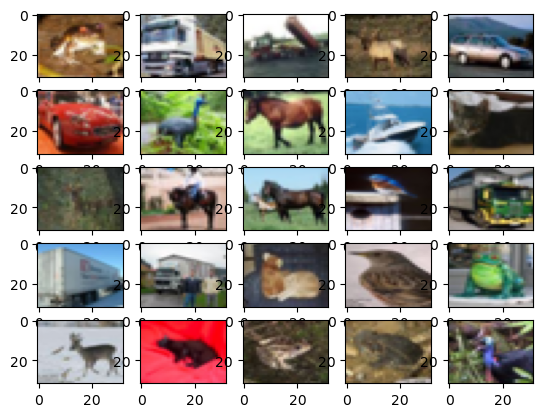

In [11]:
# plotting some random 10 images

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig, ax = plt.subplots(5,5)
k=0
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train1[k], aspect='auto')
        k+=1

plt.show()

In [14]:
# Nombre de classes
K = len(set(y_train1))
K
# Pour la sortie

10

#### Modeling
Ici on utilisera les reseux de neronnes convolutionnels car les images fournis sont beaucoup plus complexes

In [23]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Model

In [21]:
#Contruction du model
#Input layer
i = Input(shape = x_train1[0].shape)
x = Conv2D(32, (3,3), activation='relu', padding = 'same')(i)
x = Dropout(0.2)(x)
x = Conv2D(32, (3,3), activation='relu', padding = 'same')(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3), activation='relu', padding = 'same')(x)
x = Dropout(0.2)(x)
x = Conv2D(64, (3,3), activation='relu', padding = 'same')(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128, (3,3), activation='relu', padding = 'same')(x)
x = Dropout(0.2)(x)
x = Conv2D(128, (3,3), activation='relu', padding = 'same')(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

L'interet d'utiliser les reseaux de neuronne convolutionnels est de filtrer les images avant de les entrainer
#La fonction Conv2D(nb_filtre,(),)
#Dropout(): Supprimer quelque couche de sortie
#MaxPooling() permet le regroupement des pixels de l'image et des filtres en un sous ensemble
Ainsi MaxPooling((2,2)) regroupera les pixels (2,2) en selectionnant le maximum de chaque sous-groupe pour ainsi reduire le taille de l'image à 1/4 en d'autre terme, compresser l'image
Le processus s'appelle extraction de caracterisques
Avec cette methodologie le reseau apprend en s'inspirant des caracteristiques plutot que sur les pixels brutes de l'image

In [22]:
#Hiden Layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)

In [24]:
#Output Layer
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

In [25]:
#Description du model

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0     

In [28]:
#Compilation

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [29]:
#Entrainnement

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)

Epoch 1/20
1563/1563 [==============================] - 3010s 2s/step - loss: 1.8135 - accuracy: 0.3592 - val_loss: 1.4675 - val_accuracy: 0.4616
Epoch 2/20
1563/1563 [==============================] - 2267s 1s/step - loss: 1.3606 - accuracy: 0.5063 - val_loss: 1.4055 - val_accuracy: 0.4895
Epoch 3/20
1563/1563 [==============================] - 1932s 1s/step - loss: 1.2265 - accuracy: 0.5623 - val_loss: 1.1080 - val_accuracy: 0.6135
Epoch 4/20
1563/1563 [==============================] - 2148s 1s/step - loss: 1.1558 - accuracy: 0.5925 - val_loss: 1.0552 - val_accuracy: 0.6305
Epoch 5/20
1563/1563 [==============================] - 2140s 1s/step - loss: 1.1025 - accuracy: 0.6125 - val_loss: 1.2855 - val_accuracy: 0.5585
Epoch 6/20
1563/1563 [==============================] - 1792s 1s/step - loss: 1.0754 - accuracy: 0.6234 - val_loss: 0.9996 - val_accuracy: 0.6570
Epoch 7/20
1563/1563 [==============================] - 1738s 1s/step - loss: 1.0486 - accuracy: 0.6352 - val_loss: 1.1352 -

#### Visualisation des metrics d'apprentissage

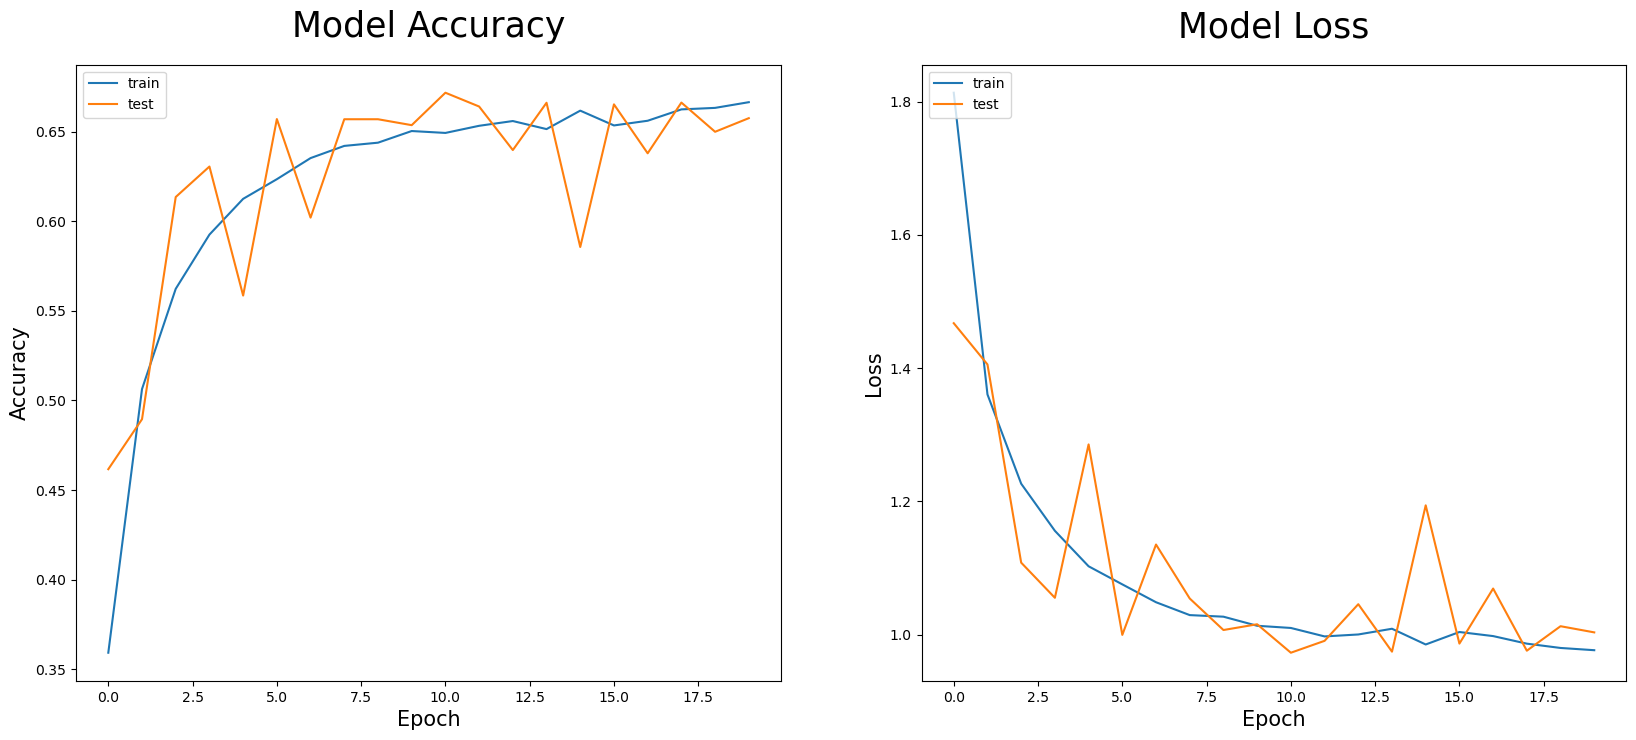

In [30]:
# Plotting the Model Accuracy & Model Loss vs Epochs (Hidden Input)
plt.figure(figsize=[20,8])

# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('Model Accuracy', size=25, pad=20)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
# summarize history for loss

plt.subplot(1,2,2)
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('Model Loss', size=25, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

La remarque peut-etre ici que le modèle n'est pas assez performant dans les cas de generalisation sur les train et test set

#### Prediction de valeur

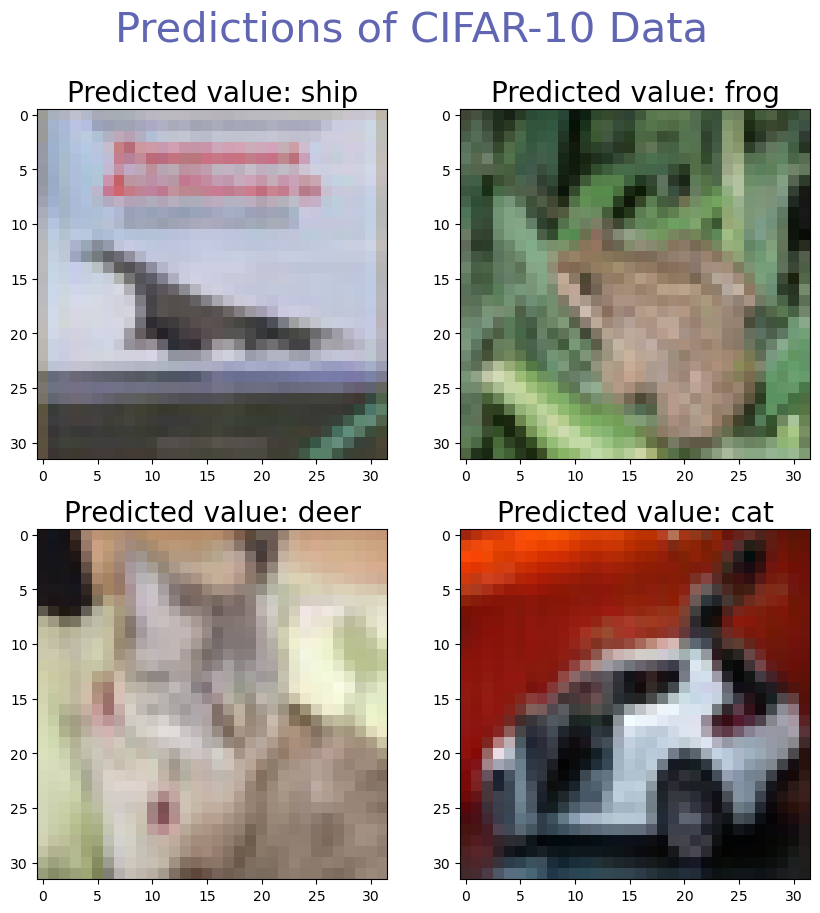

In [31]:
# Checking the predictions! (Hidden Input)
predictions = model.predict(x_test)

plt.figure(figsize=[10,10])

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.subplot(2,2,1)
n = 3
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.subplot(2,2,2)
n = 4
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.subplot(2,2,3)
n = 8
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.subplot(2,2,4)
n = 6
plt.imshow(x_test[n].reshape(32, 32, -1), cmap=plt.cm.binary)
plt.title("Predicted value: " + str(class_names[np.argmax(predictions[n], axis=0)]), size=20)
plt.grid(False)

plt.suptitle("Predictions of CIFAR-10 Data", size=30, color="#6166B3")

plt.show()